### Importing the relevant libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from scipy.special import erfc
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import StratifiedKFold

### Load the training dataset and test dataset

In [2]:
train=pd.read_csv('train.csv')

In [3]:
test=pd.read_csv('test.csv')

In [4]:
#shape of train and test data
train.shape, test.shape

((200000, 202), (200000, 201))

In [5]:
#Observing train data
train.head(5)

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,train_0,0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,...,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
1,train_1,0,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,...,7.6421,7.7214,2.5837,10.9516,15.4305,2.0339,8.1267,8.7889,18.3560,1.9518
2,train_2,0,8.6093,-2.7457,12.0805,7.8928,10.5825,-9.0837,6.9427,14.6155,...,2.9057,9.7905,1.6704,1.6858,21.6042,3.1417,-6.5213,8.2675,14.7222,0.3965
3,train_3,0,11.0604,-2.1518,8.9522,7.1957,12.5846,-1.8361,5.8428,14.9250,...,4.4666,4.7433,0.7178,1.4214,23.0347,-1.2706,-2.9275,10.2922,17.9697,-8.9996
4,train_4,0,9.8369,-1.4834,12.8746,6.6375,12.2772,2.4486,5.9405,19.2514,...,-1.4905,9.5214,-0.1508,9.1942,13.2876,-1.5121,3.9267,9.5031,17.9974,-8.8104


In [85]:
#Observing test data
test.head(5)

,ID_code,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,test_0,11.0656,7.7798,12.9536,9.4292,11.4327,-2.3805,5.8493,18.2675,2.1337,...,-2.1556,11.8495,-1.4300,2.4508,13.7112,2.4669,4.3654,10.7200,15.4722,-8.7197
1,test_1,8.5304,1.2543,11.3047,5.1858,9.1974,-4.0117,6.0196,18.6316,-4.4131,...,10.6165,8.8349,0.9403,10.1282,15.5765,0.4773,-1.4852,9.8714,19.1293,-20.9760
2,test_2,5.4827,-10.3581,10.1407,7.0479,10.2628,9.8052,4.8950,20.2537,1.5233,...,-0.7484,10.9935,1.9803,2.1800,12.9813,2.1281,-7.1086,7.0618,19.8956,-23.1794
3,test_3,8.5374,-1.3222,12.0220,6.5749,8.8458,3.1744,4.9397,20.5660,3.3755,...,9.5702,9.0766,1.6580,3.5813,15.1874,3.1656,3.9567,9.2295,13.0168,-4.2108
4,test_4,11.7058,-0.1327,14.1295,7.7506,9.1035,-8.5848,6.8595,10.6048,2.9890,...,4.2259,9.1723,1.2835,3.3778,19.5542,-0.2860,-5.1612,7.2882,13.9260,-9.1846


In [86]:
# Datatype of the variables of train dataset
train.dtypes

ID_code     object
target       int64
var_0      float64
var_1      float64
var_2      float64
            ...   
var_195    float64
var_196    float64
var_197    float64
var_198    float64
var_199    float64
Length: 202, dtype: object

In [87]:
# Datatype of the variables of test dataset
test.dtypes

ID_code     object
var_0      float64
var_1      float64
var_2      float64
var_3      float64
            ...   
var_195    float64
var_196    float64
var_197    float64
var_198    float64
var_199    float64
Length: 201, dtype: object

### Exploratory data Analysis 

#### Counting observations as per the target class

In [88]:
train.target.value_counts()

0    179902
1     20098
Name: target, dtype: int64

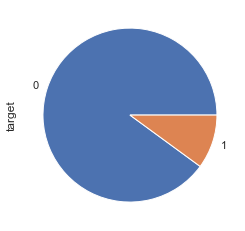

In [89]:
#plotting pie chart for target class
train['target'].value_counts().plot(kind='pie', figsize=(4,4))

#### Dealing with missing Values

In [90]:
train.isnull().sum()

ID_code    0
target     0
var_0      0
var_1      0
var_2      0
          ..
var_195    0
var_196    0
var_197    0
var_198    0
var_199    0
Length: 202, dtype: int64

In [91]:
test.isnull().sum()

ID_code    0
var_0      0
var_1      0
var_2      0
var_3      0
          ..
var_195    0
var_196    0
var_197    0
var_198    0
var_199    0
Length: 201, dtype: int64

#### Exploring the descriptive statistics of the variables

In [92]:
train.describe()

,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
count,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,...,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000
mean,0.100490,10.679914,-1.627622,10.715192,6.796529,11.078333,-5.065317,5.408949,16.545850,0.284162,...,3.234440,7.438408,1.927839,3.331774,17.993784,-0.142088,2.303335,8.908158,15.870720,-3.326537
std,0.300653,3.040051,4.050044,2.640894,2.043319,1.623150,7.863267,0.866607,3.418076,3.332634,...,4.559922,3.023272,1.478423,3.992030,3.135162,1.429372,5.454369,0.921625,3.010945,10.438015
min,0.000000,0.408400,-15.043400,2.117100,-0.040200,5.074800,-32.562600,2.347300,5.349700,-10.505500,...,-14.093300,-2.691700,-3.814500,-11.783400,8.694400,-5.261000,-14.209600,5.960600,6.299300,-38.852800
25%,0.000000,8.453850,-4.740025,8.722475,5.254075,9.883175,-11.200350,4.767700,13.943800,-2.317800,...,-0.058825,5.157400,0.889775,0.584600,15.629800,-1.170700,-1.946925,8.252800,13.829700,-11.208475
50%,0.000000,10.524750,-1.608050,10.580000,6.825000,11.108250,-4.833150,5.385100,16.456800,0.393700,...,3.203600,7.347750,1.901300,3.396350,17.957950,-0.172700,2.408900,8.888200,15.934050,-2.819550
75%,0.000000,12.758200,1.358625,12.516700,8.324100,12.261125,0.924800,6.003000,19.102900,2.937900,...,6.406200,9.512525,2.949500,6.205800,20.396525,0.829600,6.556725,9.593300,18.064725,4.836800
max,1.000000,20.315000,10.376800,19.353000,13.188300,16.671400,17.251600,8.447700,27.691800,10.151300,...,18.440900,16.716500,8.402400,18.281800,27.928800,4.272900,18.321500,12.000400,26.079100,28.500700


In [93]:
test.describe()

,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
count,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,...,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000
mean,10.658737,-1.624244,10.707452,6.788214,11.076399,-5.050558,5.415164,16.529143,0.277135,7.569407,...,3.189766,7.458269,1.925944,3.322016,17.996967,-0.133657,2.290899,8.912428,15.869184,-3.246342
std,3.036716,4.040509,2.633888,2.052724,1.616456,7.869293,0.864686,3.424482,3.333375,1.231865,...,4.551239,3.025189,1.479966,3.995599,3.140652,1.429678,5.446346,0.920904,3.008717,10.398589
min,0.188700,-15.043400,2.355200,-0.022400,5.484400,-27.767000,2.216400,5.713700,-9.956000,4.243300,...,-14.093300,-2.407000,-3.340900,-11.413100,9.382800,-4.911900,-13.944200,6.169600,6.584000,-39.457800
25%,8.442975,-4.700125,8.735600,5.230500,9.891075,-11.201400,4.772600,13.933900,-2.303900,6.623800,...,-0.095000,5.166500,0.882975,0.587600,15.634775,-1.160700,-1.948600,8.260075,13.847275,-11.124000
50%,10.513800,-1.590500,10.560700,6.822350,11.099750,-4.834100,5.391600,16.422700,0.372000,7.632000,...,3.162400,7.379000,1.892600,3.428500,17.977600,-0.162000,2.403600,8.892800,15.943400,-2.725950
75%,12.739600,1.343400,12.495025,8.327600,12.253400,0.942575,6.005800,19.094550,2.930025,8.584825,...,6.336475,9.531100,2.956000,6.174200,20.391725,0.837900,6.519800,9.595900,18.045200,4.935400
max,22.323400,9.385100,18.714100,13.142000,16.037100,17.253700,8.302500,28.292800,9.665500,11.003600,...,20.359000,16.716500,8.005000,17.632600,27.947800,4.545400,15.920700,12.275800,26.538400,27.907400


#### Outlier Analysis

In [94]:
def plot_boxplot(df, features):
    i=0
    sns.set_style('whitegrid')
    plt.figure()
    fig,ax = plt.subplots(nrows=10,ncols=5,figsize=(18,24))
    
    for feature in features:
        i=i+1
        plt.subplot(10,5,i)
        sns.boxplot(df[feature])
        plt.xlabel(feature,fontsize=12)
        locs, labels = plt.xticks()
        plt.tick_params(axis='x', labelsize=6, pad=-6)
        plt.tick_params(axis='y',labelsize=6)
    plt.show()

<Figure size 432x288 with 0 Axes>

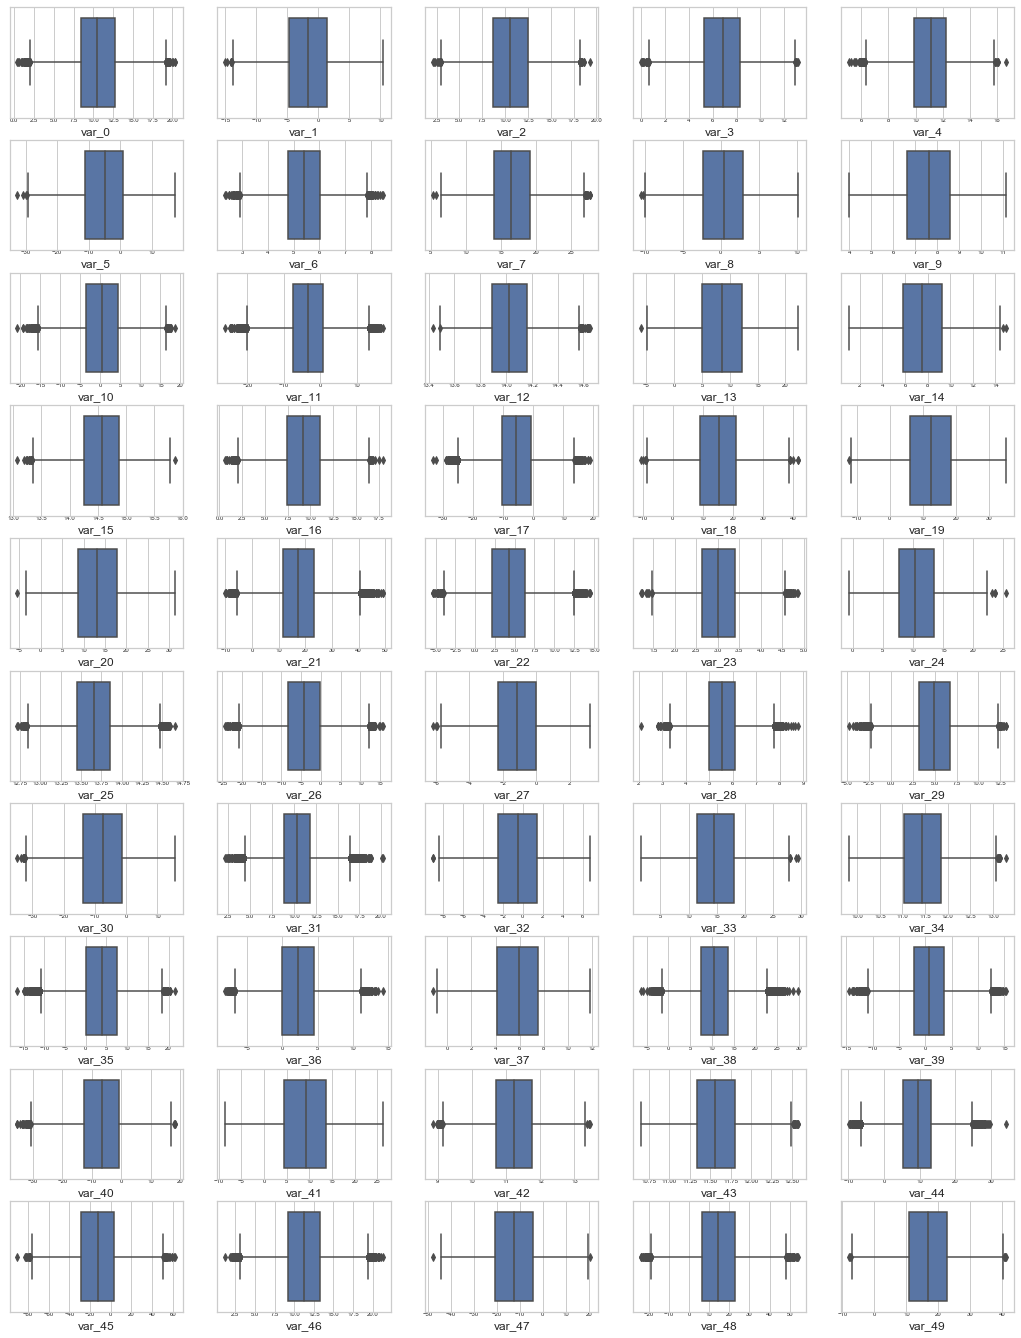

In [95]:
 # From var_0 to var_49 (training set)
features = train.columns.values[2:52]
plot_boxplot(train,features)

<Figure size 432x288 with 0 Axes>

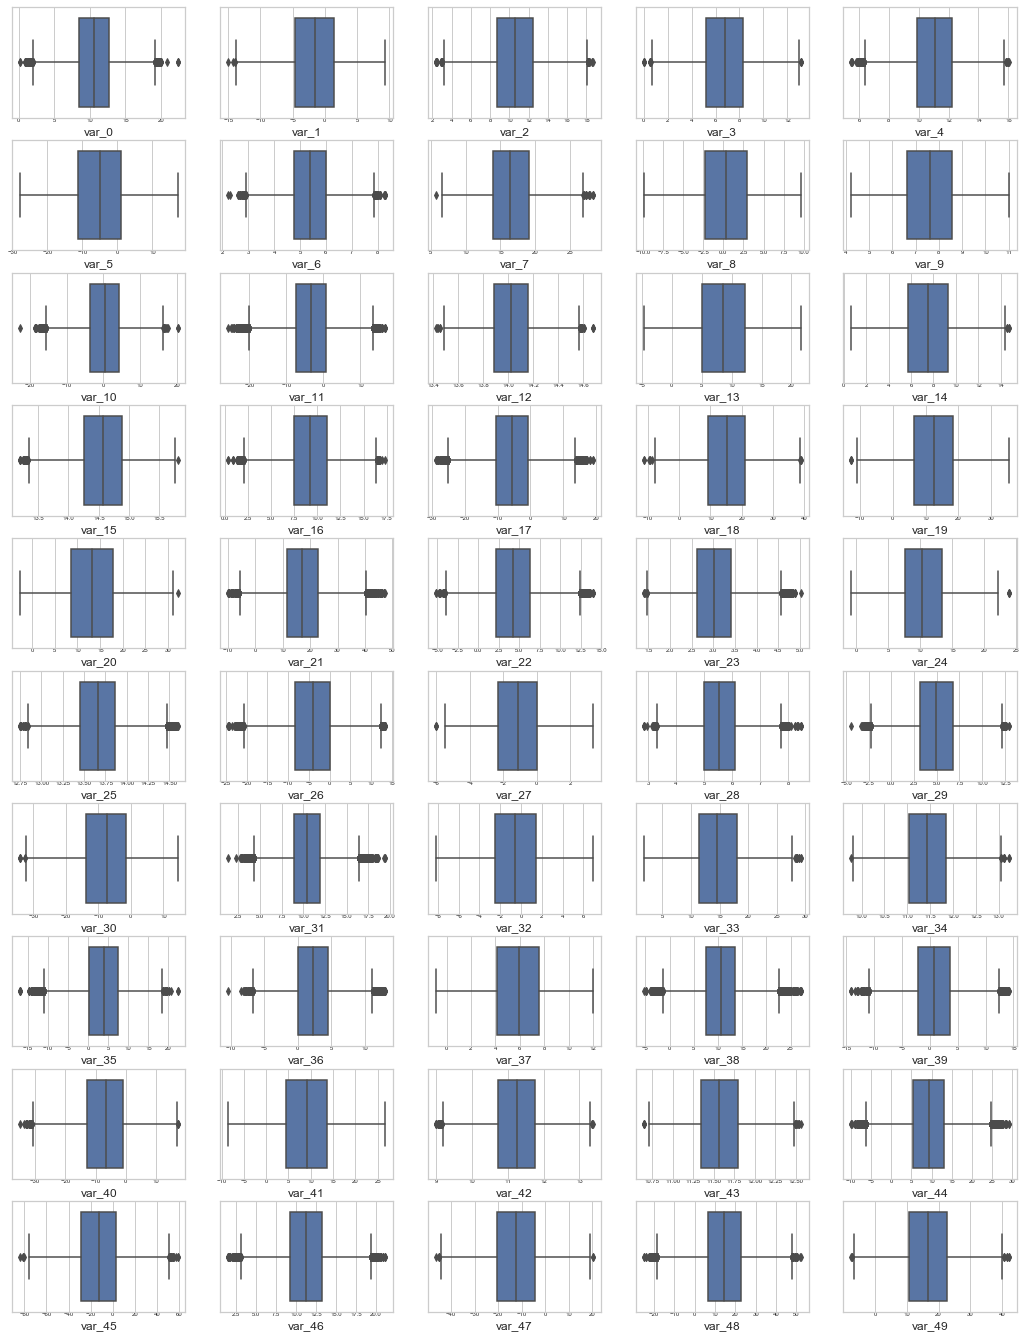

In [96]:
# From var_0 to var_49 (test set)
features = test.columns.values[1:51]
plot_boxplot(test,features)

#### Correlation Analysis

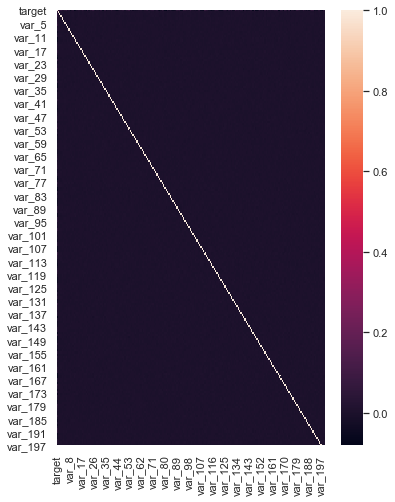

In [44]:
# Correlation Analysis in Training dataset
train_corr = train.corr()
plt.figure(figsize=(6,8))
sns.heatmap(train_corr)

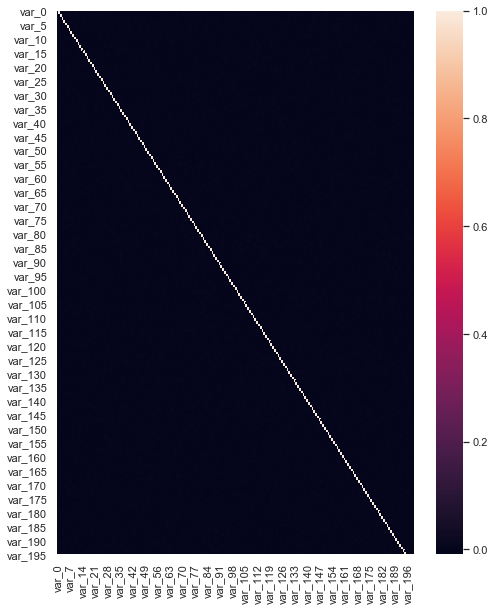

In [19]:
# Correlation Analysis in Test dataset
test_corr = test.corr()
plt.figure(figsize=(8,10))
sns.heatmap(test_corr)

#### Removing Outliers

In [6]:
### Saving the names of Continuous, independent Variables
cnames_train=train.columns[2:202]
cnames_test=test.columns[1:201]

In [7]:
cnames_train
cnames_test

Index(['var_0', 'var_1', 'var_2', 'var_3', 'var_4', 'var_5', 'var_6', 'var_7',
       'var_8', 'var_9',
       ...
       'var_190', 'var_191', 'var_192', 'var_193', 'var_194', 'var_195',
       'var_196', 'var_197', 'var_198', 'var_199'],
      dtype='object', length=200)

In [8]:
### Detect and replace the outliers with NA in training data
for i in cnames_train:
    q75,q25 = np.percentile(train.loc[:,i],[75,25])
    iqr = q75-q25
   
    min = q25-(iqr*1.5)
    max = q75+(iqr*1.5)

    train = train.drop(train[train.loc[:,i]<min].index)
    train = train.drop(train[train.loc[:,i]>max].index)

In [9]:
### Detect and delete outliers from test data
for i in cnames_test:
   
    q75,q25 = np.percentile(train.loc[:,i],[75,25])
    iqr = q75-q25
   
    min = q25-(iqr*1.5)
    max = q75+(iqr*1.5)

    test = test.drop(test[test.loc[:,i]<min].index)
    test = test.drop(test[test.loc[:,i]>max].index)

In [10]:
#shape of train and test data after removal of outliers 
train.shape,test.shape

((175073, 202), (174011, 201))

In [11]:
# Description of train dataset after outlier analysis
train.describe()

,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
count,175073.000000,175073.000000,175073.000000,175073.000000,175073.000000,175073.000000,175073.000000,175073.000000,175073.000000,175073.000000,...,175073.000000,175073.000000,175073.000000,175073.000000,175073.000000,175073.000000,175073.000000,175073.000000,175073.000000,175073.000000
mean,0.097691,10.680201,-1.635942,10.711507,6.795677,11.078524,-5.071101,5.407802,16.545620,0.289605,...,3.238189,7.427826,1.924028,3.343734,17.993673,-0.141449,2.297313,8.908086,15.876076,-3.326583
std,0.296897,3.031999,4.048808,2.635507,2.042796,1.620351,7.867062,0.864390,3.417344,3.331695,...,4.539034,3.015767,1.455468,3.952981,3.134064,1.425334,5.453998,0.921239,3.003489,10.425672
min,0.000000,2.004400,-13.867400,3.035500,0.673200,6.318300,-29.188300,2.917000,6.465300,-9.991100,...,-9.748700,-1.358800,-2.192300,-7.833600,8.694400,-4.168600,-14.209600,6.245200,7.484500,-35.174900
25%,0.000000,8.455600,-4.751700,8.721800,5.250900,9.883200,-11.210100,4.767700,13.939200,-2.310500,...,-0.051700,5.152300,0.892000,0.602300,15.628700,-1.169400,-1.952300,8.252800,13.837500,-11.203300
50%,0.000000,10.529600,-1.616700,10.576800,6.823000,11.106500,-4.852000,5.383700,16.454600,0.405300,...,3.208600,7.334600,1.900700,3.395400,17.960800,-0.173800,2.403000,8.889300,15.942500,-2.835600
75%,0.000000,12.757100,1.345600,12.510400,8.324500,12.259300,0.925800,6.001700,19.107400,2.939800,...,6.394400,9.501500,2.943100,6.201500,20.396400,0.830400,6.549800,9.593300,18.070700,4.821900
max,1.000000,19.213500,10.376800,18.206700,12.924900,15.807100,17.251600,7.854100,26.760200,10.151300,...,16.079700,16.029500,6.039500,14.619800,27.528400,3.811800,18.321500,11.600100,24.413900,28.500700


In [12]:
# Description of test dataset after outlier analysis
test.describe()

,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
count,174011.000000,174011.000000,174011.000000,174011.000000,174011.000000,174011.000000,174011.000000,174011.000000,174011.000000,174011.000000,...,174011.000000,174011.000000,174011.000000,174011.000000,174011.000000,174011.000000,174011.000000,174011.000000,174011.000000,174011.000000
mean,10.652905,-1.624882,10.703876,6.786323,11.078000,-5.054963,5.413908,16.529305,0.272613,7.569490,...,3.185556,7.455956,1.921212,3.333511,17.993204,-0.133025,2.293945,8.912950,15.872977,-3.248891
std,3.029788,4.039827,2.632744,2.052839,1.613429,7.873647,0.862245,3.425222,3.334383,1.232478,...,4.529084,3.020472,1.457582,3.944680,3.137841,1.427313,5.445204,0.920677,3.000275,10.400250
min,2.077300,-13.765100,3.039900,0.720200,6.319200,-27.767000,2.923100,6.652900,-9.956000,4.243300,...,-9.718600,-1.295600,-2.183200,-7.786500,9.382800,-4.167800,-13.944200,6.302900,7.488500,-35.225100
25%,8.439800,-4.698800,8.730300,5.231250,9.893100,-11.214500,4.772800,13.932400,-2.310200,6.624100,...,-0.090100,5.164450,0.886700,0.606700,15.632250,-1.161900,-1.946800,8.260000,13.856400,-11.124350
50%,10.513300,-1.595100,10.557000,6.820500,11.102600,-4.836400,5.391300,16.422400,0.368200,7.632100,...,3.147200,7.380300,1.889400,3.428900,17.967100,-0.161700,2.411200,8.893200,15.949700,-2.718200
75%,12.732700,1.339200,12.492700,8.326150,12.252900,0.941800,6.004200,19.095500,2.924000,8.585100,...,6.320500,9.531250,2.949000,6.166800,20.387200,0.837800,6.525100,9.597550,18.047200,4.929950
max,19.207500,9.385100,18.181200,12.856500,15.821500,17.253700,7.850900,26.813000,9.665500,11.003600,...,16.055000,16.016200,6.019100,14.548200,27.347400,3.821900,15.920700,11.589500,24.364000,27.907400


Distribution of Columns


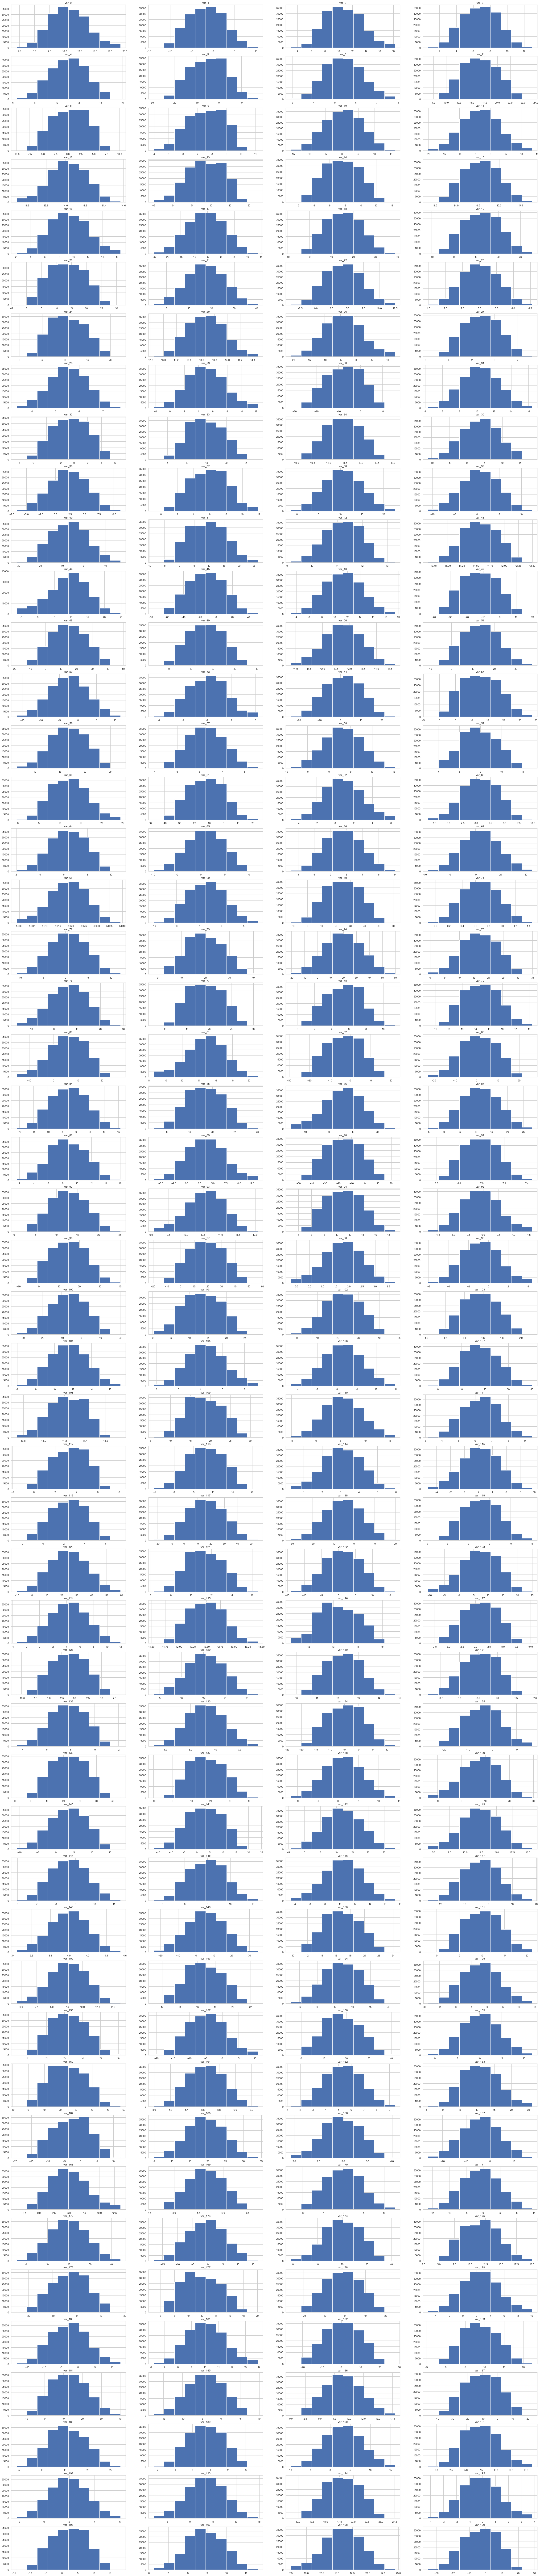

In [63]:
#hisograms are used to check distribution of data 
#drawing histograms of numeric data in training set 
numerical_features=train.columns[2:]
print("Distribution of Columns")
plt.figure(figsize=(40,200))
for i,col in enumerate(numerical_features):
    plt.subplot(50,4,i+1)
    plt.hist(train[col])
    plt.title(col)

#### Distribution of mean,median,standard deviation, skewness frequency, min and max of train and test dataset

In [64]:
numerical_features_with_values=train.columns.values[2:202]

In [65]:
train_mean_rowwise=list(train[numerical_features_with_values].mean(axis=1))
test_mean_rowwise=list(test[numerical_features_with_values].mean(axis=1))

train_median_rowwise=list(train[numerical_features_with_values].median(axis=1))
test_median_rowwise=list(test[numerical_features_with_values].median(axis=1))

train_std_rowwise=list(train[numerical_features_with_values].std(axis=1))
test_std_rowwise=list(test[numerical_features_with_values].std(axis=1))

train_skew_rowwise=list(train[numerical_features_with_values].skew(axis=1))
test_skew_rowwise=list(test[numerical_features_with_values].skew(axis=1))

train_min_rowwise=list(train[numerical_features_with_values].min(axis=1))
test_min_rowwise=list(test[numerical_features_with_values].min(axis=1))

train_max_rowwise=list(train[numerical_features_with_values].max(axis=1))
test_max_rowwise=list(test[numerical_features_with_values].max(axis=1))

In [66]:
def plot_stats(x1,x2,aim,wise):
    colors = ['Green', 'Blue']
    names = ['train','test']
    plt.figure(figsize=(25,8))
    plt.hist([x1,x2], bins =120, density=True,
         color = colors, label=names)
    sns.kdeplot(x1,color=colors[0])
    sns.kdeplot(x2,color=colors[1])
    # Plot formatting
    plt.legend()
    plt.xlabel(aim+' values')
    plt.ylabel('Normalized Density')
    plt.title('Distribution of '+aim+' per '+wise+' in train and test data')

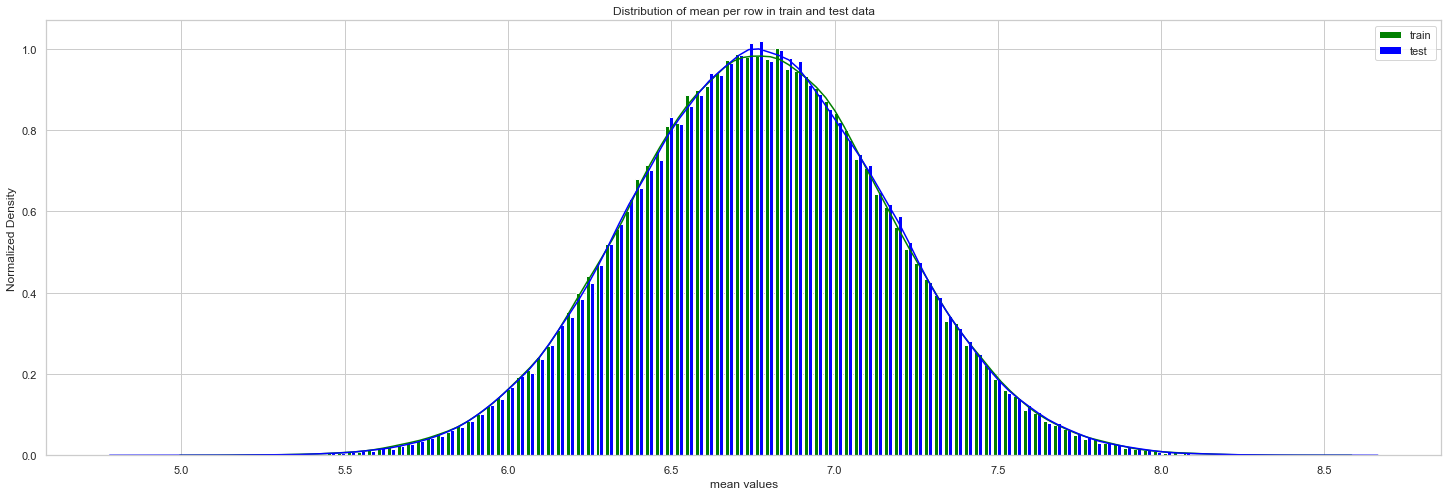

In [67]:
plot_stats(train_mean_rowwise,test_mean_rowwise,'mean','row')

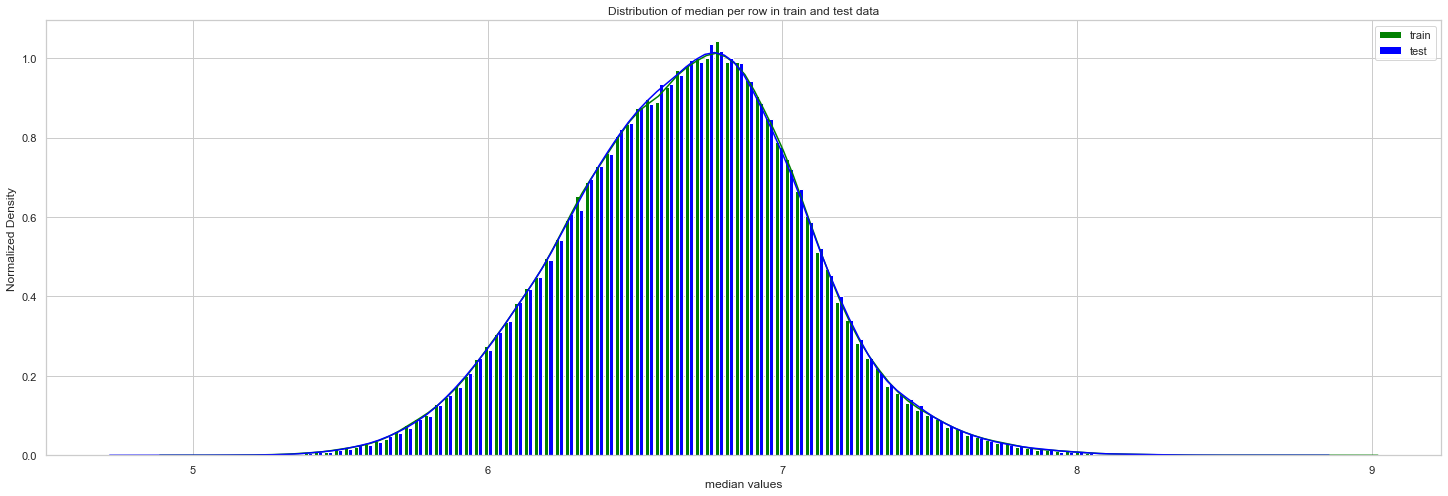

In [68]:
plot_stats(train_median_rowwise,test_median_rowwise,'median','row')

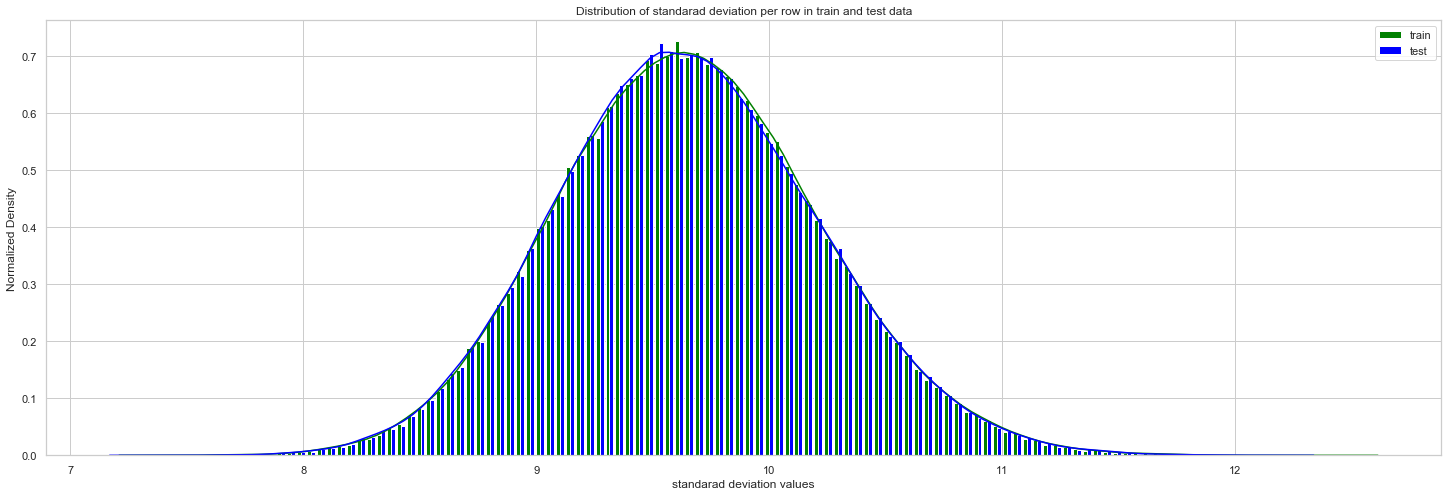

In [69]:
plot_stats(train_std_rowwise,test_std_rowwise,'standarad deviation','row')

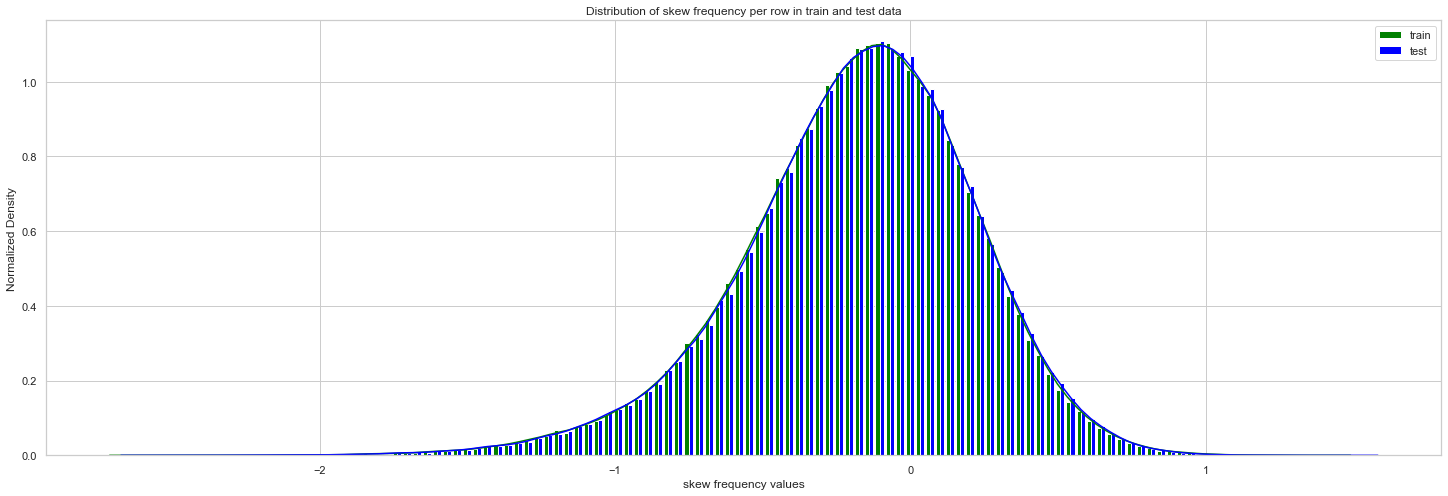

In [70]:
plot_stats(train_skew_rowwise,test_skew_rowwise,'skew frequency','row')

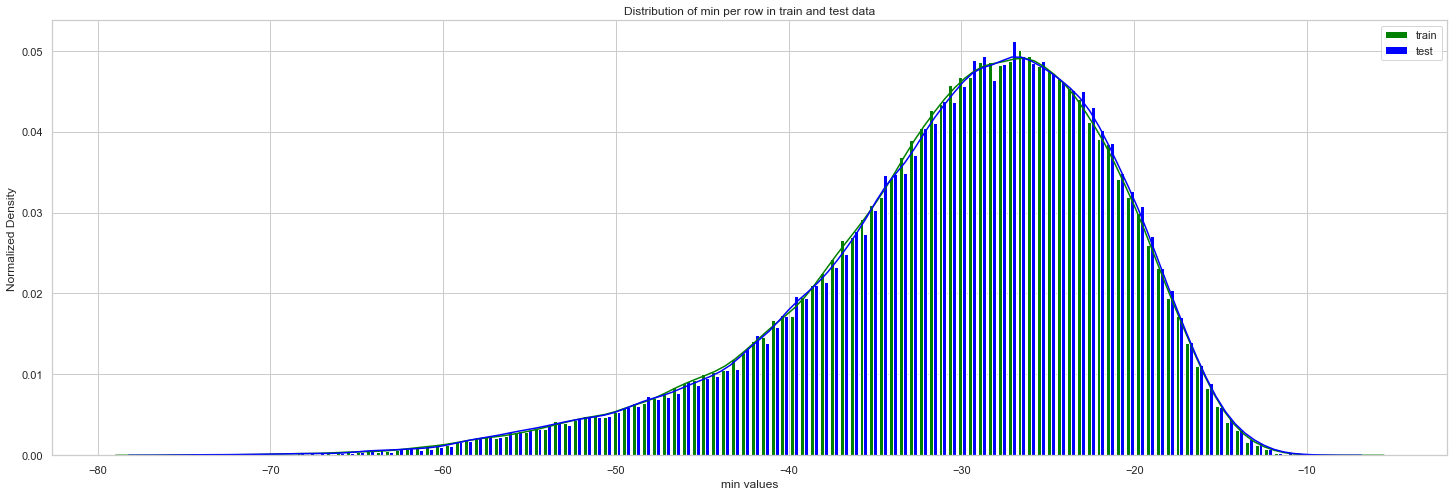

In [71]:
plot_stats(train_min_rowwise,test_min_rowwise,'min','row')

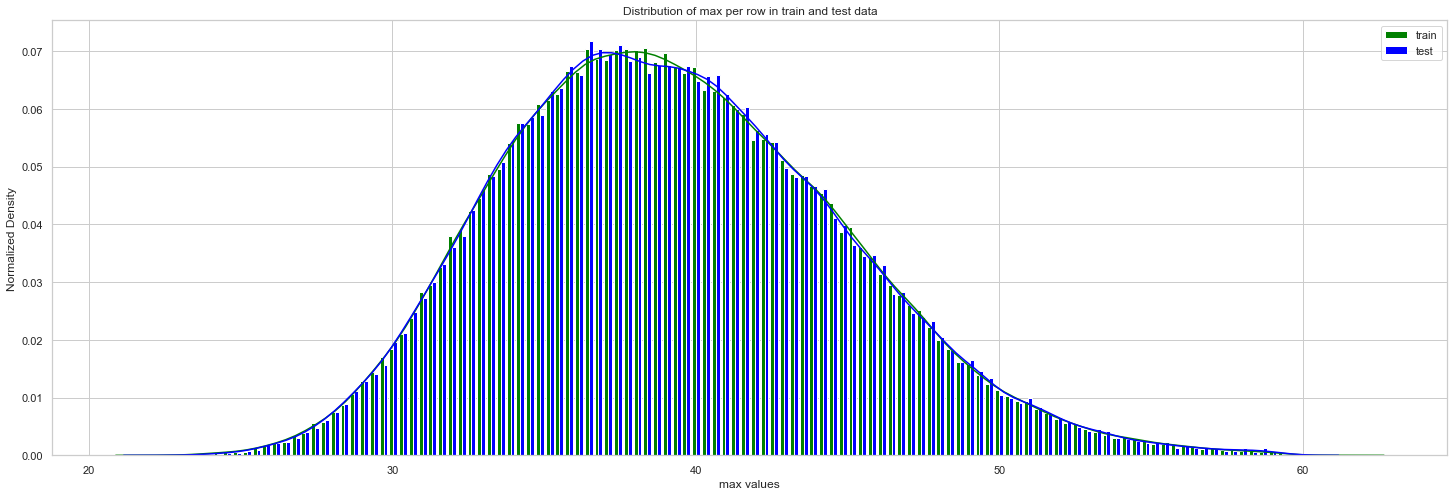

In [72]:
plot_stats(train_max_rowwise,test_max_rowwise,'max','row')

#### We can make few observations here:
##### 1. Standard deviation is relatively large for both train and test variable data.
##### 2. min, max, mean, median, sdt values for train and test data looks quite close.
##### 3. Mean values are distributed over a large range.
##### 4. Moreover mean and median have simmilar distribution.
##### 5. Both train and test are negatively skewed.
##### 6. We have 200 variables in both train and test set which don't have any correlation between them.
##### 7. All the histograms of 200 numerical features resemble the shape of normal distribution

### Feature Scaling

In [13]:
# Seperating dependent and independent variables from training dataset
x_train=train.iloc[:,2:202].values # Independent Variable
y_train=train.iloc[:,1].values # Dependent Variable

x_test=test.iloc[:,1:201].values # Independent Variable

In [14]:
sc=StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

 ### Dimensionality Reduction

#### Principal Component Analysis

In [ ]:
pca = PCA()  
a = pca.fit_transform(x_train) 
b = pca.transform(x_test)

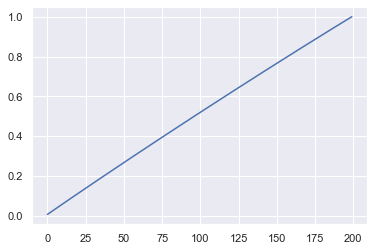

In [39]:
explained_variance = pca.explained_variance_ratio_
plt.plot(np.arange(200), np.cumsum(explained_variance))

#### Observation:-

#### The line of cumulative sums of explained variance ratio when we PCA the data set, it indicates that the dataset has already undergone PCA (get straight line ie y=x).
#### We have to go with all 200 variables

 ### Model Development

#### Classification Model

#### 1. Logistic Regression

In [104]:
y = train['target']
x = train.drop(['target','ID_code'],axis=1)

In [105]:
y.shape,x.shape

((175073,), (175073, 200))

In [106]:
# Splitting of dataset into train and test
X_train, X_test, Y_train, Y_test =train_test_split(x, y, stratify = y, random_state=42, test_size=0.3)

In [107]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [108]:
X_train.shape, Y_train.shape

((122551, 200), (122551,))

In [109]:
X_test.shape , Y_test.shape

((52522, 200), (52522,))

In [52]:
from sklearn.linear_model import LogisticRegression

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import RandomizedSearchCV

C = LogisticRegression()

import math

parameter_data = [0.0001,0.001,0.01,0.1,1,5,10,20,30,40]
log_my_data=[math.log10(x) for x in parameter_data]

#print(log_my_data)
print('printing parameter data and corresponding log_value')
data = {'Parameter value':parameter_data,'Corresponding log_value':log_my_data}
param=pd.DataFrame(data)
print('=' * 100)
print(param)


printing parameter data and corresponding log_value
   Parameter value  Corresponding log_value
0           0.0001                -4.000000
1           0.0010                -3.000000
2           0.0100                -2.000000
3           0.1000                -1.000000
4           1.0000                 0.000000
5           5.0000                 0.698970
6          10.0000                 1.000000
7          20.0000                 1.301030
8          30.0000                 1.477121
9          40.0000                 1.602060


In [47]:
parameters= {'C' : parameter_data}
clf=RandomizedSearchCV(C, parameters, cv=3 , scoring='roc_auc',return_train_score=True,n_jobs=-1)
clf.fit(X_train,Y_train)

RandomizedSearchCV(cv=3, error_score='raise-deprecating',
                   estimator=LogisticRegression(C=1.0, class_weight=None,
                                                dual=False, fit_intercept=True,
                                                intercept_scaling=1,
                                                l1_ratio=None, max_iter=100,
                                                multi_class='warn', n_jobs=None,
                                                penalty='l2', random_state=None,
                                                solver='warn', tol=0.0001,
                                                verbose=0, warm_start=False),
                   iid='warn', n_iter=10, n_jobs=-1,
                   param_distributions={'C': [0.0001, 0.001, 0.01, 0.1, 1, 5,
                                              10, 20, 30, 40]},
                   pre_dispatch='2*n_jobs', random_state=None, refit=True,
                   return_train_score=True, scoring='roc_

In [19]:
train_auc=clf.cv_results_['mean_train_score']
train_auc_std=clf.cv_results_['std_train_score']
cv_auc=clf.cv_results_['mean_test_score']
cv_auc_std=clf.cv_results_['std_test_score']

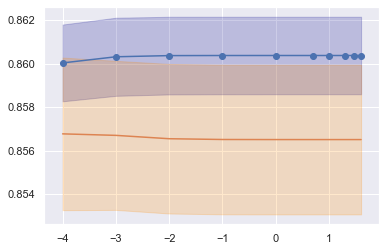

In [20]:
plt.plot(log_my_data,train_auc,label='Train AUC')
plt.gca().fill_between(log_my_data,train_auc-train_auc_std,train_auc+train_auc_std,alpha=.2,color='darkblue')

plt.plot(log_my_data,cv_auc,label='CV AUC')
plt.gca().fill_between(log_my_data,cv_auc-cv_auc_std,cv_auc+cv_auc_std,alpha=.2,color='darkorange')

plt.scatter(log_my_data,train_auc,label='Train AUC points')

In [134]:
def model_predict (clf,data):
    
    y_data_pred = []
    y_data_pred.extend(clf.predict_proba(data[:])[:,1])
    
    return y_data_pred

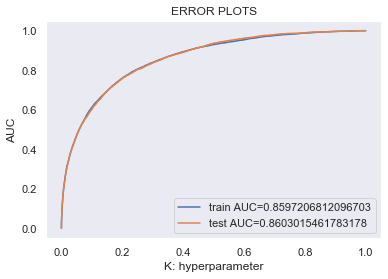

In [74]:
from sklearn.metrics import roc_curve,auc
neigh=LogisticRegression(C=1.0,class_weight=None,dual=False,fit_intercept=True,intercept_scaling=1,max_iter=100,multi_class='warn',n_jobs=None,penalty='l2',random_state=None,solver='warn',tol=0.0001,verbose=0,warm_start=False)
neigh.fit(X_train,Y_train)

Y_train_pred=model_predict(neigh,X_train)
Y_test_pred=model_predict(neigh,X_test)

train_fpr,train_tpr,tr_thresholds = roc_curve(Y_train,Y_train_pred)
test_fpr,test_tpr,te_thresholds = roc_curve(Y_test,Y_test_pred)

plt.plot(train_fpr,train_tpr,label='train AUC=' +str(auc(train_fpr,train_tpr)))
plt.plot(test_fpr,test_tpr,label='test AUC=' +str(auc(test_fpr,test_tpr)))

plt.legend()
plt.xlabel('K: hyperparameter')
plt.ylabel('AUC')
plt.title('ERROR PLOTS')
plt.grid()
plt.show()



In [111]:
classifier=LogisticRegression(random_state=0)
classifier.fit(X_train,Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=0, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [117]:
Y_pred=classifier.predict(X_test)

In [118]:
Y_test.shape,Y_pred.shape

((52522,), (52522,))

In [119]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(Y_test,Y_pred)
cm=pd.crosstab(Y_test,Y_pred)

TN=cm.iloc[0,0]
FN=cm.iloc[1,0]
TP=cm.iloc[1,1]
FP=cm.iloc[0,1]

In [120]:
cm

col_0,0,1
target,,
0,46770,621
1,3765,1366


In [121]:
test=test.drop('ID_code',axis=1)
predictions_test=classifier.predict(test)

In [122]:
test=pd.read_csv('test.csv')

In [144]:
test.head()

,ID_code,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,test_0,11.0656,7.7798,12.9536,9.4292,11.4327,-2.3805,5.8493,18.2675,2.1337,...,-2.1556,11.8495,-1.4300,2.4508,13.7112,2.4669,4.3654,10.7200,15.4722,-8.7197
1,test_1,8.5304,1.2543,11.3047,5.1858,9.1974,-4.0117,6.0196,18.6316,-4.4131,...,10.6165,8.8349,0.9403,10.1282,15.5765,0.4773,-1.4852,9.8714,19.1293,-20.9760
2,test_2,5.4827,-10.3581,10.1407,7.0479,10.2628,9.8052,4.8950,20.2537,1.5233,...,-0.7484,10.9935,1.9803,2.1800,12.9813,2.1281,-7.1086,7.0618,19.8956,-23.1794
3,test_3,8.5374,-1.3222,12.0220,6.5749,8.8458,3.1744,4.9397,20.5660,3.3755,...,9.5702,9.0766,1.6580,3.5813,15.1874,3.1656,3.9567,9.2295,13.0168,-4.2108
4,test_4,11.7058,-0.1327,14.1295,7.7506,9.1035,-8.5848,6.8595,10.6048,2.9890,...,4.2259,9.1723,1.2835,3.3778,19.5542,-0.2860,-5.1612,7.2882,13.9260,-9.1846


In [152]:
id_code=test.iloc[:,0]

In [153]:
df=pd.DataFrame({'ID_code':id_code,'target':predictions_test})
df.head(5)

,ID_code,target
0,11.0656,0
1,8.5304,0
2,5.4827,0
3,8.5374,0
4,11.7058,0


In [154]:
df=df.drop('ID_code',axis=1)
test_logistic=df.join(test)
test_logistic.head()

,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,0,11.0656,7.7798,12.9536,9.4292,11.4327,-2.3805,5.8493,18.2675,2.1337,...,-2.1556,11.8495,-1.4300,2.4508,13.7112,2.4669,4.3654,10.7200,15.4722,-8.7197
1,0,8.5304,1.2543,11.3047,5.1858,9.1974,-4.0117,6.0196,18.6316,-4.4131,...,10.6165,8.8349,0.9403,10.1282,15.5765,0.4773,-1.4852,9.8714,19.1293,-20.9760
2,0,5.4827,-10.3581,10.1407,7.0479,10.2628,9.8052,4.8950,20.2537,1.5233,...,-0.7484,10.9935,1.9803,2.1800,12.9813,2.1281,-7.1086,7.0618,19.8956,-23.1794
3,0,8.5374,-1.3222,12.0220,6.5749,8.8458,3.1744,4.9397,20.5660,3.3755,...,9.5702,9.0766,1.6580,3.5813,15.1874,3.1656,3.9567,9.2295,13.0168,-4.2108
4,0,11.7058,-0.1327,14.1295,7.7506,9.1035,-8.5848,6.8595,10.6048,2.9890,...,4.2259,9.1723,1.2835,3.3778,19.5542,-0.2860,-5.1612,7.2882,13.9260,-9.1846


#### Naive Bayes

In [132]:
from sklearn.naive_bayes import GaussianNB

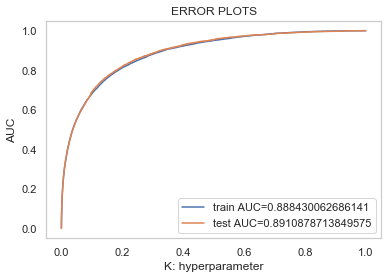

In [136]:
from sklearn.metrics import roc_curve,auc
neigh = GaussianNB()
neigh.fit(x_train, y_train)

Y_train_pred=model_predict(neigh,X_train)
Y_test_pred=model_predict(neigh,X_test)

train_fpr,train_tpr,tr_thresholds = roc_curve(Y_train,Y_train_pred)
test_fpr,test_tpr,te_thresholds = roc_curve(Y_test,Y_test_pred)

plt.plot(train_fpr,train_tpr,label='train AUC=' +str(auc(train_fpr,train_tpr)))
plt.plot(test_fpr,test_tpr,label='test AUC=' +str(auc(test_fpr,test_tpr)))

plt.legend()
plt.xlabel('K: hyperparameter')
plt.ylabel('AUC')
plt.title('ERROR PLOTS')
plt.grid()
plt.show()



In [137]:
model = GaussianNB()
model.fit(x_train, y_train)


GaussianNB(priors=None, var_smoothing=1e-09)

In [147]:
test=test.drop('ID_code',axis=1)
Y_pred=model.predict(X_test)

In [140]:
cm=confusion_matrix(Y_test,Y_pred)
cm=pd.crosstab(Y_test,Y_pred)

TN=cm.iloc[0,0]
FN=cm.iloc[1,0]
TP=cm.iloc[1,1]
FP=cm.iloc[0,1]

cm

col_0,0,1
target,,
0,46770,621
1,3765,1366


In [148]:
test.shape

(174011, 200)

In [149]:
predictions_test=model.predict(test)

In [151]:
id_code=test.iloc[:,0]
df=pd.DataFrame({'ID_code':id_code,'target':predictions_test})
df.head()

,ID_code,target
0,11.0656,1
1,8.5304,1
2,5.4827,1
3,8.5374,1
4,11.7058,1


In [152]:
test_nb=df.join(test)

In [153]:
test_nb.head(2)

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,11.0656,1,11.0656,7.7798,12.9536,9.4292,11.4327,-2.3805,5.8493,18.2675,...,-2.1556,11.8495,-1.4300,2.4508,13.7112,2.4669,4.3654,10.7200,15.4722,-8.7197
1,8.5304,1,8.5304,1.2543,11.3047,5.1858,9.1974,-4.0117,6.0196,18.6316,...,10.6165,8.8349,0.9403,10.1282,15.5765,0.4773,-1.4852,9.8714,19.1293,-20.9760


#### Random Forest

In [154]:
from sklearn.ensemble import RandomForestClassifier

C=RandomForestClassifier()

n_estimators=[10,50,100,200]
max_depth=[1,5,10,50]

import math
log_max_depth=[math.log10(x) for x in max_depth]
log_n_estimators=[math.log10(x) for x in n_estimators]

print('Printing parameter Data and Corresponding Log Value for Max depth')

data={'Parameter value':max_depth,'Corresponding Log Value':log_max_depth}
param=pd.DataFrame(data)
print('='*100)
print(param)

print('Printing parameter Data and Corresponding Log Value for Estimators')

data={'Parameter value':n_estimators,'Corresponding Log Value':log_n_estimators}
param=pd.DataFrame(data)
print('='*100)
print(param)

Printing parameter Data and Corresponding Log Value for Max depth
   Parameter value  Corresponding Log Value
0                1                  0.00000
1                5                  0.69897
2               10                  1.00000
3               50                  1.69897
Printing parameter Data and Corresponding Log Value for Estimators
   Parameter value  Corresponding Log Value
0               10                  1.00000
1               50                  1.69897
2              100                  2.00000
3              200                  2.30103


In [156]:
parameters = {'n_estimators':n_estimators, 'max_depth':max_depth}
clf=RandomizedSearchCV(C, parameters, cv=3 , scoring='roc_auc',return_train_score=True,n_jobs=-1)
clf.fit(X_train,Y_train)

RandomizedSearchCV(cv=3, error_score='raise-deprecating',
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    n_estimators='warn',
                                                    n_jobs=None

In [157]:
train_auc=clf.cv_results_['mean_train_score']
train_auc_std=clf.cv_results_['std_train_score']
cv_auc=clf.cv_results_['mean_test_score']
cv_auc_std=clf.cv_results_['std_test_score']

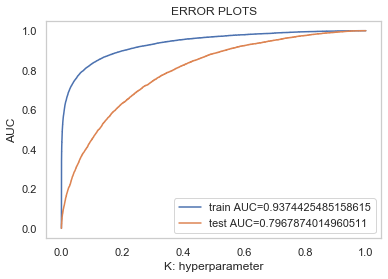

In [158]:
from sklearn.metrics import roc_curve,auc

neigh=RandomForestClassifier(n_estimators=100,max_depth=10,class_weight='balanced')
neigh.fit(X_train,Y_train)

Y_train_pred=model_predict(neigh,X_train)
Y_test_pred=model_predict(neigh,X_test)

train_fpr,train_tpr,tr_thresholds = roc_curve(Y_train,Y_train_pred)
test_fpr,test_tpr,te_thresholds = roc_curve(Y_test,Y_test_pred)

plt.plot(train_fpr,train_tpr,label='train AUC=' +str(auc(train_fpr,train_tpr)))
plt.plot(test_fpr,test_tpr,label='test AUC=' +str(auc(test_fpr,test_tpr)))

plt.legend()
plt.xlabel('K: hyperparameter')
plt.ylabel('AUC')
plt.title('ERROR PLOTS')
plt.grid()
plt.show()


In [161]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(n_estimators=10,criterion='entropy',random_state=0)
rfc.fit(X_train,Y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [162]:
Y_pred=rfc.predict(X_test)

In [166]:
cm=confusion_matrix(Y_test,Y_pred)
cm=pd.crosstab(Y_test,Y_pred)

TN=cm.iloc[0,0]
FN=cm.iloc[1,0]
TP=cm.iloc[1,1]
FP=cm.iloc[0,1]

cm

col_0,0,1
target,,
0,47368,23
1,5107,24


In [167]:
predictions_rfc=rfc.predict(test)

In [168]:
df=pd.DataFrame({'ID_code':id_code,'target':predictions_rfc})
df.head()

,ID_code,target
0,11.0656,1
1,8.5304,0
2,5.4827,1
3,8.5374,0
4,11.7058,1


### Regression Model

#### Light GBM

In [21]:
!pip install lightgbm

In [22]:
import lightgbm as lgb

In [26]:
# From the train columns list, i have drop the ID and target to form the features list

features =[c for c in train.columns if c not in['ID_code','target']]
target=train['target']

In [16]:
param={'bagging_freq':5,'bagging_fraction':0.4,'boost_from_average':'false','boost':'gbdt','feature_fraction':0.05,'learning_rate':0.01,'max_depth':-1,'metric':'auc','min_data_in_leaf':80,'min_sum_hessian_in_leaf':10.0,'num_leaves':13,'num_threads':8,'tree_learner':'serial','objective':'binary','verbosity':1}

In [27]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score,roc_curve

folds=StratifiedKFold(n_splits=10,shuffle=False,random_state=44000)
oof=np.zeros(len(train))
predictions=np.zeros(len(test))
feature_importance_df=pd.DataFrame()

In [28]:
for fold_, (trn_idx, val_idx) in enumerate(folds.split(train.values, target.values)):
    print("Fold {}".format(fold_))
    trn_data = lgb.Dataset(train.iloc[trn_idx][features], label=target.iloc[trn_idx])
    val_data = lgb.Dataset(train.iloc[val_idx][features], label=target.iloc[val_idx])

    num_round = 1000000
    clf = lgb.train(param, trn_data, num_round, valid_sets = [trn_data, val_data], verbose_eval=1000, early_stopping_rounds = 3000)
    oof[val_idx] = clf.predict(train.iloc[val_idx][features], num_iteration=clf.best_iteration)
    
    fold_importance_df = pd.DataFrame()
    fold_importance_df["Feature"] = features
    fold_importance_df["importance"] = clf.feature_importance()
    fold_importance_df["fold"] = fold_ + 1
    feature_importance_df = pd.concat([feature_importance_df, fold_importance_df], axis=0)
    
    predictions += clf.predict(test[features], num_iteration=clf.best_iteration) / folds.n_splits

print("CV score: {:<8.5f}".format(roc_auc_score(target, oof)))

Fold 0
Training until validation scores don't improve for 3000 rounds
[1000]	training's auc: 0.900471	valid_1's auc: 0.878973
[2000]	training's auc: 0.913061	valid_1's auc: 0.887565
[3000]	training's auc: 0.921248	valid_1's auc: 0.891482
[4000]	training's auc: 0.927482	valid_1's auc: 0.894222
[5000]	training's auc: 0.932829	valid_1's auc: 0.895772
[6000]	training's auc: 0.937527	valid_1's auc: 0.896816
[7000]	training's auc: 0.941821	valid_1's auc: 0.897375
[8000]	training's auc: 0.945874	valid_1's auc: 0.897677
[9000]	training's auc: 0.949709	valid_1's auc: 0.897926
[10000]	training's auc: 0.953374	valid_1's auc: 0.898232
[11000]	training's auc: 0.956745	valid_1's auc: 0.898131
[12000]	training's auc: 0.960054	valid_1's auc: 0.898164
[13000]	training's auc: 0.963135	valid_1's auc: 0.898226
[14000]	training's auc: 0.966134	valid_1's auc: 0.898054
Early stopping, best iteration is:
[11146]	training's auc: 0.957231	valid_1's auc: 0.898309
Fold 1
Training until validation scores don't imp

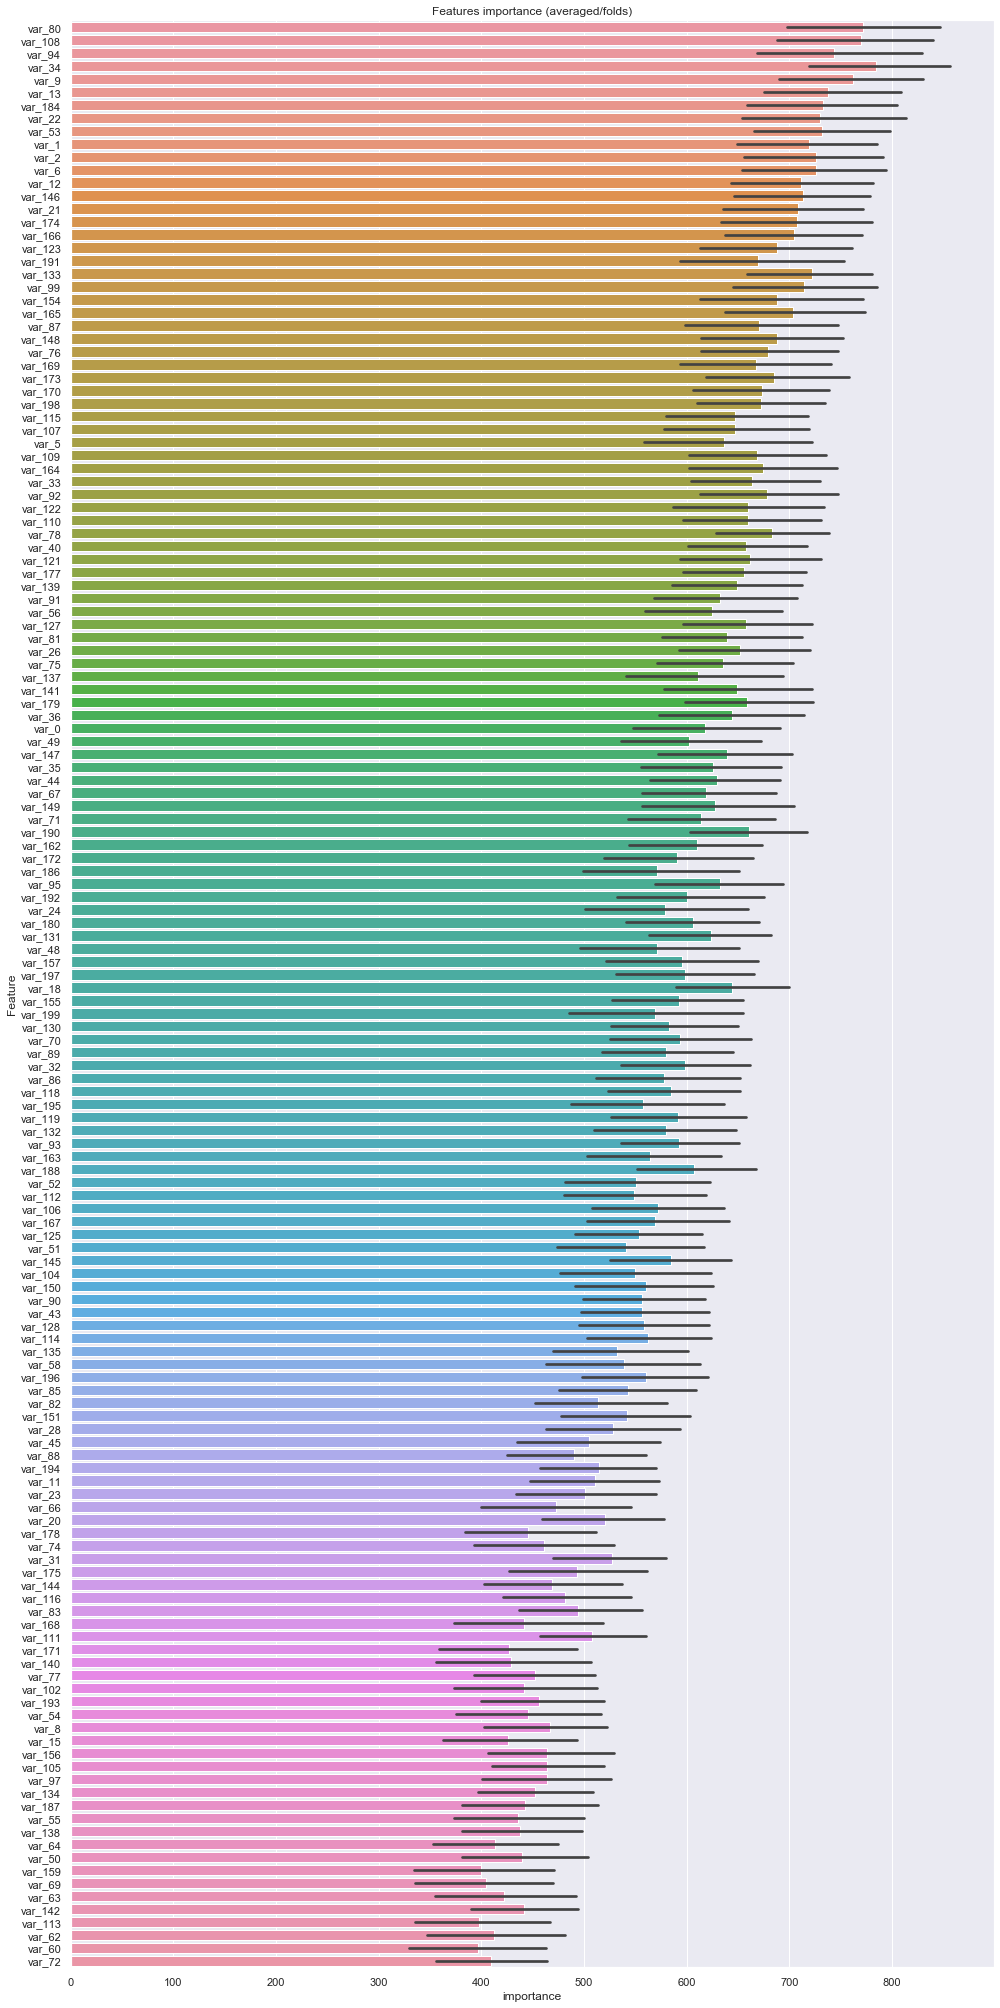

In [32]:
cols = (feature_importance_df[['Feature','importance']].groupby('Feature').mean().sort_values(by='importance',ascending=False)[:150].index)
best_features=feature_importance_df.loc[feature_importance_df.Feature.isin(cols)]

plt.figure(figsize=(14,28))
sns.barplot(x='importance',y='Feature',data=best_features.sort_values(by='importance',ascending=False))
plt.title('Features importance (averaged/folds)')
plt.tight_layout()
plt.show()

In [34]:
sub_df = pd.DataFrame({'ID_code':test['ID_code'].values})
sub_df['target'] = predictions
sub_df.to_csv('submission.csv',index=False)